<a href="https://colab.research.google.com/github/Aditya-Poli/EC312_GA/blob/main/GA_TSP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.auto import tqdm
from IPython.display import HTML



# class for solving TSP using GA

class TSP:

	def __init__(self,
		cities:'dict',
		num_pop:'int'=50,
		mutation_rate:'int'=0.1,
		crossover_prob:'int'=0.85,
		elitism:'bool'=True):

		self.cities = cities
		self.num_pop = num_pop
		self.mutation_rate = mutation_rate
		self.crossover_probability = crossover_prob
		self.elitism = elitism

    

In [ ]:
cities = np.array(['A', 'B', 'C', 'D'])

In [ ]:
from itertools import permutations

In [ ]:
perm = np.array(list(permutations(cities)))

In [ ]:
perm

array([['A', 'B', 'C', 'D'],
       ['A', 'B', 'D', 'C'],
       ['A', 'C', 'B', 'D'],
       ['A', 'C', 'D', 'B'],
       ['A', 'D', 'B', 'C'],
       ['A', 'D', 'C', 'B'],
       ['B', 'A', 'C', 'D'],
       ['B', 'A', 'D', 'C'],
       ['B', 'C', 'A', 'D'],
       ['B', 'C', 'D', 'A'],
       ['B', 'D', 'A', 'C'],
       ['B', 'D', 'C', 'A'],
       ['C', 'A', 'B', 'D'],
       ['C', 'A', 'D', 'B'],
       ['C', 'B', 'A', 'D'],
       ['C', 'B', 'D', 'A'],
       ['C', 'D', 'A', 'B'],
       ['C', 'D', 'B', 'A'],
       ['D', 'A', 'B', 'C'],
       ['D', 'A', 'C', 'B'],
       ['D', 'B', 'A', 'C'],
       ['D', 'B', 'C', 'A'],
       ['D', 'C', 'A', 'B'],
       ['D', 'C', 'B', 'A']], dtype='<U1')

In [ ]:
cities = {
		'A':(2, 6),
		'B':(5, 8),
		'C':(8, 26),
		'D':(10, 32)
	}


In [ ]:
def _calc_distance_(tour):
    for i, city in enumerate(tour):
        j = 0 if(i+1) == len(tour) else i+1
        


In [ ]:
from scipy.spatial import distance
import math

In [ ]:
from matplotlib.mathtext import MathtextBackend
def _calc_distance_(tour):
    coordinates = list(cities.values())
    dst = 0
    for i in range(len(coordinates)):
        j = 0 if i+1 == len(coordinates) else i+1
        a, b = coordinates[i], coordinates[j]
        dst += math.hypot(a[0]-b[0], a[1], b[1])
    return dst


In [ ]:
_calc_distance_(perm[-1])

112.61381498529958

In [ ]:
a = np.array([1, 2, 3])
print(np.linalg.norm(a))

In [ ]:
perm

array([['A', 'B', 'C', 'D'],
       ['A', 'B', 'D', 'C'],
       ['A', 'C', 'B', 'D'],
       ['A', 'C', 'D', 'B'],
       ['A', 'D', 'B', 'C'],
       ['A', 'D', 'C', 'B'],
       ['B', 'A', 'C', 'D'],
       ['B', 'A', 'D', 'C'],
       ['B', 'C', 'A', 'D'],
       ['B', 'C', 'D', 'A'],
       ['B', 'D', 'A', 'C'],
       ['B', 'D', 'C', 'A'],
       ['C', 'A', 'B', 'D'],
       ['C', 'A', 'D', 'B'],
       ['C', 'B', 'A', 'D'],
       ['C', 'B', 'D', 'A'],
       ['C', 'D', 'A', 'B'],
       ['C', 'D', 'B', 'A'],
       ['D', 'A', 'B', 'C'],
       ['D', 'A', 'C', 'B'],
       ['D', 'B', 'A', 'C'],
       ['D', 'B', 'C', 'A'],
       ['D', 'C', 'A', 'B'],
       ['D', 'C', 'B', 'A']], dtype='<U1')

In [ ]:
idxs= np.random.choice(np.arange(0, len(perm)), 50)
idxs

array([ 1, 23,  4, 11, 11, 21,  7, 18, 11, 14, 20, 13, 16, 21, 17, 19, 17,
        2, 18, 21,  5, 18, 18,  6, 13, 10,  8, 13,  3,  2,  2,  9,  3, 22,
        8,  4, 22,  8,  7,  1,  2, 19,  5, 18, 16,  2, 18,  0,  2, 23])

In [ ]:
perm[idxs]

array([['A', 'B', 'D', 'C'],
       ['D', 'C', 'B', 'A'],
       ['A', 'D', 'B', 'C'],
       ['B', 'D', 'C', 'A'],
       ['B', 'D', 'C', 'A'],
       ['D', 'B', 'C', 'A'],
       ['B', 'A', 'D', 'C'],
       ['D', 'A', 'B', 'C'],
       ['B', 'D', 'C', 'A'],
       ['C', 'B', 'A', 'D'],
       ['D', 'B', 'A', 'C'],
       ['C', 'A', 'D', 'B'],
       ['C', 'D', 'A', 'B'],
       ['D', 'B', 'C', 'A'],
       ['C', 'D', 'B', 'A'],
       ['D', 'A', 'C', 'B'],
       ['C', 'D', 'B', 'A'],
       ['A', 'C', 'B', 'D'],
       ['D', 'A', 'B', 'C'],
       ['D', 'B', 'C', 'A'],
       ['A', 'D', 'C', 'B'],
       ['D', 'A', 'B', 'C'],
       ['D', 'A', 'B', 'C'],
       ['B', 'A', 'C', 'D'],
       ['C', 'A', 'D', 'B'],
       ['B', 'D', 'A', 'C'],
       ['B', 'C', 'A', 'D'],
       ['C', 'A', 'D', 'B'],
       ['A', 'C', 'D', 'B'],
       ['A', 'C', 'B', 'D'],
       ['A', 'C', 'B', 'D'],
       ['B', 'C', 'D', 'A'],
       ['A', 'C', 'D', 'B'],
       ['D', 'C', 'A', 'B'],
       ['B', '

In [ ]:
def _generate_init_():
    global cities
    _cities = list(cities.keys())
    perm = np.array(list(permutations(_cities)))
    idxs =  np.random.choice(np.arange(0, len(perm)) \
        , 50)
    print(idxs)
    pop = perm[idxs]
    return pop

In [ ]:
_generate_init_()

[10 20 11  4  6  4 15 20  3 12  4 20  8 14 15 20  3 23 15 13 21 21 16 17
  5  9  3  0  5  0 17 18  4  2 16  3  2 10 13 16  7 21  9  0 10 18 11 23
  2  2]


array([['B', 'D', 'A', 'C'],
       ['D', 'B', 'A', 'C'],
       ['B', 'D', 'C', 'A'],
       ['A', 'D', 'B', 'C'],
       ['B', 'A', 'C', 'D'],
       ['A', 'D', 'B', 'C'],
       ['C', 'B', 'D', 'A'],
       ['D', 'B', 'A', 'C'],
       ['A', 'C', 'D', 'B'],
       ['C', 'A', 'B', 'D'],
       ['A', 'D', 'B', 'C'],
       ['D', 'B', 'A', 'C'],
       ['B', 'C', 'A', 'D'],
       ['C', 'B', 'A', 'D'],
       ['C', 'B', 'D', 'A'],
       ['D', 'B', 'A', 'C'],
       ['A', 'C', 'D', 'B'],
       ['D', 'C', 'B', 'A'],
       ['C', 'B', 'D', 'A'],
       ['C', 'A', 'D', 'B'],
       ['D', 'B', 'C', 'A'],
       ['D', 'B', 'C', 'A'],
       ['C', 'D', 'A', 'B'],
       ['C', 'D', 'B', 'A'],
       ['A', 'D', 'C', 'B'],
       ['B', 'C', 'D', 'A'],
       ['A', 'C', 'D', 'B'],
       ['A', 'B', 'C', 'D'],
       ['A', 'D', 'C', 'B'],
       ['A', 'B', 'C', 'D'],
       ['C', 'D', 'B', 'A'],
       ['D', 'A', 'B', 'C'],
       ['A', 'D', 'B', 'C'],
       ['A', 'C', 'B', 'D'],
       ['C', '

In [ ]:
def crossover(parent1, parent2):
    idx = np.random.randint(parent1.size())
    child1 = parent1
    child1.

In [ ]:
def _remove(arr1, arr2):
    a = []
    for i in arr1:
        if i not in arr2:
            a.append(i)
    return np.array(a)

In [ ]:
perm[-4], perm[-2]

(array(['D', 'B', 'A', 'C'], dtype='<U1'),
 array(['D', 'C', 'A', 'B'], dtype='<U1'))

In [ ]:
_remove(perm[-4], perm[-2][:2])

array(['B', 'A'], dtype='<U1')

In [ ]:
!ls

sample_data  TSP_test.py


In [ ]:
!python3 TSP_test.py

^C


In [ ]:
!pip install --upgrade numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def nearest_neighbor(cities, coordinates):
    cities = list(cities)
    start_city = np.random.choice(cities)
    tour = [start_city]
    unvisited_cities = set(cities) - set(tour)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: TSP.euclidean_distance(coordinates[cities.index(tour[-1])], coordinates[cities.index(city)]))
        tour.append(nearest_city)
        unvisited_cities.remove(nearest_city)

    return np.array(tour)

In [1]:
def random_tours(cities):
    cities = list(cities)
    start_city = np.random.choice(cities)
    cities.remove(start_city)
    np.random.shuffle(cities)
    return np.concatenate(([start_city], cities))

In [ ]:
cities = np.array(['A', 'B', 'C', 'D'])
coordinates = np.array(list(map(np.array, [(2,6), (5, 16), (8,32), (2, 24)])))

In [ ]:
nearest_neighbor(cities, coordinates)

array(['D', 'B', 'A', 'C'], dtype='<U1')

In [ ]:
random_tours(cities)

array(['A', 'B', 'D', 'C'], dtype='<U1')

In [ ]:
TSP._calc_distance_(nearest_neighbor(cities, coordinates), cities, coordinates)

[0] [1]
[1] [3]
[3] [2]
[2] [0]


55.667638382480746

In [ ]:
np.where(nearest_neighbor(cities, coordinates)=='A')[0][0]

3

In [ ]:
def crossover(parent1, parent2):
        idx = np.random.randint(parent1.size)
        child1 = np.concatenate(np.delete(parent2[idx:], parent1[:idx], assume_unique=True)), parent1[:idx])
        child2 = np.concatenate((parent2[:idx], np.intersect1d(parent1[idx:], parent2[:idx], assume_unique=True)))
        return child1, child2

In [ ]:
p1 = np.array(['A', 'C', 'D', 'B'])
p2 = np.array(['D','A', 'B', 'C'])

In [ ]:
crossover(p1, p2)

(array(['A', 'A'], dtype='<U1'), array(['D', 'D'], dtype='<U1'))

In [ ]:
np.concatenate((p1[:2], p2[2:]))

array(['A', 'C', 'B', 'C'], dtype='<U1')

In [ ]:
def _remove(arr1, arr2):
    for i in arr2:
        arr1 = np.delete(arr1, np.where(arr1==i)[0][0])
    return arr1

In [ ]:
_remove(p1, p2[:2])

array(['C', 'B'], dtype='<U1')

In [ ]:

def plot_tour(best_tour, cities, coordinates, iteration):
    plt.figure(figsize=(8, 8))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], s=100, alpha=0.5)
    for i, city in enumerate(cities):
        plt.annotate(city, (coordinates[i, 0], coordinates[i, 1]), fontsize=12)
    for i in range(len(best_tour)):
        if i == len(best_tour) - 1:
            plt.plot([coordinates[best_tour[i]-1, 0], coordinates[best_tour[0]-1, 0]], [coordinates[best_tour[i]-1, 1], coordinates[best_tour[0]-1, 1]], 'r-', linewidth=2)
        else:
            plt.plot([coordinates[best_tour[i]-1, 0], coordinates[best_tour[i+1]-1, 0]], [coordinates[best_tour[i]-1, 1], coordinates[best_tour[i+1]-1, 1]], 'r-', linewidth=2)
    plt.title(f'Best Tour (Iteration {iteration})')
    plt.show()

In [ ]:
citie = {
    'A':(2, 6),
    'B':(10, 8),
    'C':(8, 26),
    'D':(10, 32),
    'E':(2, 6),
    'F':(1, 8),
    'G':(8, 26),
    'H':(1, 2),
    'I':(2, 12),
    'J':(10, 6),
    'K':(8, 6),
    'L':(1, 3)
}
cities = np.array(list(citie.keys()))
coordinates = np.array(list(map(np.array, list(citie.values()))))

In [3]:
import string

def generate_cities(num_cities, x_range, y_range):
    cities = np.array(list((string.ascii_uppercase+string.ascii_lowercase)[:num_cities]))
    x_coords = np.random.uniform(x_range[0], x_range[1], size=num_cities)
    y_coords = np.random.uniform(y_range[0], y_range[1], size=num_cities)
    coordinates = np.column_stack((x_coords, y_coords))
    return cities, coordinates

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm.auto import tqdm
import time
from IPython.display import HTML


# class for solving TSP using GA
# caching tours for improving performance
class TSP:

    def __init__(self,
        cities: 'np.ndarray',
        coordinates: 'np.ndarray',
        num_pop: 'int' = 50,
        selection_method: 'str' = 'tournament',
        tournament_size: 'int' = 3,
        mutation_rate: 'int' = 0.1,
        mutation_method: 'str' = 'swap',
        crossover_prob: 'int' = 0.85,
        elitism: 'bool' = True):

        self.cities = cities
        self.coordinates = coordinates
        self.num_pop = num_pop
        self.selection_method = selection_method
        self.tournament_size = tournament_size
        self.mutation_rate = mutation_rate
        self.mutation_method = mutation_method
        self.crossover_probability = crossover_prob
        self.elitism = elitism

        self.pop = None
        self._fitness = None
        self.best_pop = None
        self.best_fitness = None
        self.history = []

        self.tour_cache = dict()

    def _generate_init_(self):
        self.pop = np.array([random_tours(self.cities) for _ in range(self.num_pop)])
        return self.pop

    def fitness(self):
        self._fitness = np.array([self._calc_distance_(city) for city in self.pop])
        return self._fitness

    @staticmethod
    def _remove(arr1, arr2):
        for i in arr2:
            arr1 = np.delete(arr1, np.where(arr1==i)[0][0])
        return arr1

    @staticmethod
    def euclidean_distance(point1, point2):
        return np.sqrt(np.sum((point1 - point2)**2))

    def _calc_distance_(self, tour):
        if tuple(tour) in self.tour_cache:
            return self.tour_cache[tuple(tour)]
        dst = 0
        for i, city in enumerate((tour)):
            j = 0 if i+1 == len(tour) else i+1
            idx1 = np.where(self.cities == city)[0][0]
            idx2 = np.where(self.cities == tour[j])[0][0]
            a, b = self.coordinates[idx1], self.coordinates[idx2]
            dst += np.sqrt(np.sum((a - b)**2))
        # add distance from last city to first city
        idx1 = np.where(self.cities == tour[-1])[0][0]
        idx2 = np.where(self.cities == tour[0])[0][0]
        a, b = self.coordinates[idx1], self.coordinates[idx2]
        dst += np.sqrt(np.sum((a - b)**2))
        self.tour_cache[tuple(tour)] = dst
        return dst

    # Define the roulette wheel selection method
    def roulette_wheel_selection(self, fitness):
        total_fitness = np.sum(fitness)
        selection_probs = fitness / total_fitness
        selected_idx = np.random.choice(np.arange(self.num_pop), p=selection_probs)
        return self.pop[selected_idx]

    # Define the tournament selection method
    def tournament_selection(self, fitness):
        # tournament_size = int(self.num_pop * 0.1)
        selected_idx = np.random.choice(np.arange(self.num_pop), size=self.tournament_size, replace=False)
        tournament_fitness = fitness[selected_idx]
        return self.pop[selected_idx[np.argmax(tournament_fitness)]]

    # Define the rank based selection method
    def rank_based_selection(fitness, num_parents):
        ranked_fitness = np.argsort(np.argsort(-fitness)) # rank fitness in descending order
        selection_prob = ranked_fitness / np.sum(ranked_fitness) # calculate selection probabilities
        selected_indices = np.random.choices(range(len(fitness)), selection_prob, k=num_parents) # select indices based on probabilities
        return selected_indices
    
    # Define the selection function
    def selection(self, fitness):
        if self.selection_method == 'roulette_wheel':
            # Roulette wheel selection
            parent1 = self.roulette_wheel_selection(fitness)
            parent2 = self.roulette_wheel_selection(fitness)
        elif self.selection_method == 'tournament':
            # Tournament selection
            parent1 = self.tournament_selection(fitness)
            parent2 = self.tournament_selection(fitness)
        elif self.selection_method == "rank_based":
            parent1, parent2 = self.pop[self.rank_based_selection(fitness, 2)]
        else:
            raise ValueError('Invalid selection method selected!')
        return parent1, parent2

    def crossover(self, parent1, parent2):
        idx = np.random.randint(parent1.size)
        child1 = np.concatenate((parent1[:idx], TSP._remove(parent2, parent1[:idx])))
        child2 = np.concatenate((parent2[:idx], TSP._remove(parent1, parent2[:idx])))
        return child1, child2


    def mutate(self, tour):
        if np.random.rand() < self.mutation_rate:
            if self.mutation_method == 'swap':
                return self.swap_mutation(tour)
            elif self.mutation_method == 'scramble':
                return self.scramble_mutation(tour)
            elif self.mutation_method == 'inversion':
                return self.inversion_mutation(tour)
            elif self.mutation_method == 'insertion':
                return self.insertion_mutation(tour)
        return tour

    
    def swap_mutation(self, tour):
        # choose two random cities to swap
        idx1, idx2 = np.random.choice(range(tour.size), size=2, replace=False)
        tour[idx1], tour[idx2] = tour[idx2], tour[idx1]
        return tour
    
    def scramble_mutation(self, tour):
        # choose two random indices to represent the boundaries of the sub-tour to scramble
        idx1, idx2 = np.random.choice(range(tour.size), size=2, replace=False)
        # make sure idx1 < idx2
        if idx1 > idx2:
            idx1, idx2 = idx2, idx1
        # randomly shuffle the sub-tour
        sub_tour = tour[idx1:idx2+1]
        np.random.shuffle(sub_tour)
        tour[idx1:idx2+1] = sub_tour
        return tour

    def inversion_mutation(self, tour):
        # choose two random indices to represent the boundaries of the sub-tour to invert
        idx1, idx2 = np.random.choice(range(tour.size), size=2, replace=False)
        # make sure idx1 < idx2
        if idx1 > idx2:
            idx1, idx2 = idx2, idx1
        # invert the sub-tour
        sub_tour = tour[idx1:idx2+1][::-1]
        tour[idx1:idx2+1] = sub_tour
        return tour

    def insertion_mutation(self, tour):
        # choose two random indices to represent the city to insert and its new position
        idx1, idx2 = np.random.choice(range(tour.size), size=2, replace=False)
        # remove the city from its original position and insert it into its new position
        city = tour[idx1]
        tour = np.delete(tour, idx1)
        tour = np.insert(tour, idx2, city)
        return tour
    
    # Define the plot history function
    def plot_history(self):
        x = np.arange(1, self.num_gen+1)
        self.history = self.history[:self.num_gen]
        plt.plot(x, self.history)
        plt.xlabel("number of generations")
        plt.ylabel("history")
        plt.title("Convergence History")
        plt.plot(np.ones(x.shape)*x[np.argmin(self.history)], self.history)
        minima = np.array([x[np.argmin(self.history)], np.min(self.history)])
        plt.annotate(f'Best Solution {np.argmin(self.history)+1}', xy=minima+0.1, xytext=minima+0.5)
        plt.legend(["fitness", "best soution"])
        plt.savefig(f'ch_tsp_{time.strftime("%a_%d_%b_%Y_%H_%M_%S")}.png', dpi=250, format='png')
        # plt.pause(10)     # not requires in jupyter notebook


    def evolve(self, generations, anim=False):
        self._generate_init_()
        self.num_gen = generations
        self.fitness()
        self.best_pop = self.pop[np.argmin(self._fitness)]
        self.best_fitness = np.min(self._fitness)

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.scatter(self.coordinates[:, 0], self.coordinates[:, 1], s=100, alpha=0.5)
        for i, city in enumerate(self.cities):
            ax.annotate(city, (self.coordinates[i, 0], self.coordinates[i, 1]), fontsize=12)
        line, = ax.plot([], [], 'r-', linewidth=2)
        title = ax.set_title(f'Best Tour (Iteration 0)')

        def update_plot(i):
            new_pop = []

            if self.elitism:
                new_pop.append(self.best_pop)
                new_pop.append(self.best_pop)
            for j in range(self.num_pop // 2 - int(self.elitism)):
                parent1, parent2 = self.selection(-self._fitness)

                child1, child2 = parent1, parent2

                if np.random.rand() < self.crossover_probability:
                    child1, child2 = self.crossover(parent1, parent2)

                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_pop.append(child1)
                new_pop.append(child2)

            self.pop = np.array(new_pop)

            self.fitness()
            current_best = self.pop[np.argmin(self._fitness)]

            if(self._calc_distance_(current_best) < self._calc_distance_(self.best_pop)):
                self.best_pop = current_best
                self.best_fitness = np.min(self._fitness)
            
            self.history.append(self.best_fitness)

            best_pop_indices = np.array([np.where(self.cities == city)[0][0] for city in self.best_pop])
            # add the last edge from the last city to the first city
            best_pop_indices = np.append(best_pop_indices, best_pop_indices[0])
            line.set_data(self.coordinates[best_pop_indices][:, 0], self.coordinates[best_pop_indices][:, 1])
            title.set_text(f'Best Tour (Iteration {i+1}): {self.history[-1]}')
            print(f"Iteration {i+1}: Tour: {list(self.best_pop)}, Distance: {self.history[-1]}")
            return line, title

        if anim:
            anima = FuncAnimation(fig, update_plot, frames=generations, interval=200, blit=True)
            anima.save('tsp.gif', writer='imagemagick')
            # plt.show()
        else:
            for i in tqdm(range(generations)):
                update_plot(i)
                print(f"Iteration {i+1}: Tour: {list(self.best_pop)}, Distance: {self.best_fitness}")

        print(f"Best Tour: {list(self.best_pop)}, Distance: {self.best_fitness}")
        # save the best tour as an image
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.scatter(self.coordinates[:, 0], self.coordinates[:, 1], s=100, alpha=0.5)
        for i, city in enumerate(self.cities):
            ax.annotate(city, (self.coordinates[i, 0], self.coordinates[i, 1]), fontsize=12)
        best_pop_indices = np.array([np.where(self.cities == city)[0][0] for city in self.best_pop])
        # add the last edge from the last city to the first city
        best_pop_indices = np.append(best_pop_indices, best_pop_indices[0])
        ax.plot(self.coordinates[best_pop_indices][:, 0], self.coordinates[best_pop_indices][:, 1], 'r-', linewidth=2)
        ax.set_title(f'Best Tour (Distance: {self.best_fitness})')
        plt.savefig('best_tsp.jpg')
        if anim:
            return anima, self.best_pop
        return self.best_pop

In [26]:
coordinates = [(0,0),
               (20,10),
               (15,25),
               (10,50),
               (45,20),
               (34,65),
               (21,85),
               (25,110),
               (45,100),
               (61,110),
               (75,97),
               (100,100),
               (110,110),
               (89,65),
               (76,72),
               (57,69),
               (67,34),
               (80,20),
               (105,15),
               (110,45)]

cities, _ = generate_cities(len(coordinates), (-20, 20), (-40, 40))
coordinates = np.array(list(map(np.array, coordinates)))

Iteration 1: Tour: ['P', 'D', 'M', 'K', 'I', 'T', 'O', 'G', 'E', 'C', 'B', 'A', 'F', 'H', 'L', 'N', 'Q', 'R', 'J', 'S'], Distance: 1187.6481044834238
Iteration 1: Tour: ['P', 'D', 'M', 'K', 'I', 'T', 'O', 'G', 'E', 'C', 'B', 'A', 'L', 'N', 'J', 'H', 'S', 'R', 'Q', 'F'], Distance: 1085.6283931758596
Iteration 1: Tour: ['P', 'D', 'M', 'K', 'J', 'I', 'T', 'O', 'G', 'E', 'C', 'B', 'A', 'Q', 'N', 'L', 'H', 'F', 'R', 'S'], Distance: 1071.3115661804352
Iteration 1: Tour: ['R', 'P', 'D', 'M', 'K', 'J', 'I', 'T', 'O', 'G', 'E', 'C', 'B', 'A', 'Q', 'N', 'L', 'H', 'F', 'S'], Distance: 1028.9253324024623
Iteration 2: Tour: ['P', 'D', 'I', 'J', 'K', 'M', 'T', 'O', 'G', 'E', 'C', 'B', 'A', 'Q', 'N', 'L', 'H', 'F', 'S', 'R'], Distance: 981.8265175975262
Iteration 3: Tour: ['R', 'P', 'D', 'M', 'K', 'J', 'I', 'T', 'O', 'G', 'E', 'C', 'B', 'A', 'Q', 'F', 'H', 'L', 'N', 'S'], Distance: 1001.8477901078218
Iteration 4: Tour: ['R', 'P', 'D', 'M', 'K', 'J', 'I', 'T', 'Q', 'F', 'H', 'L', 'N', 'O', 'G', 'E', '

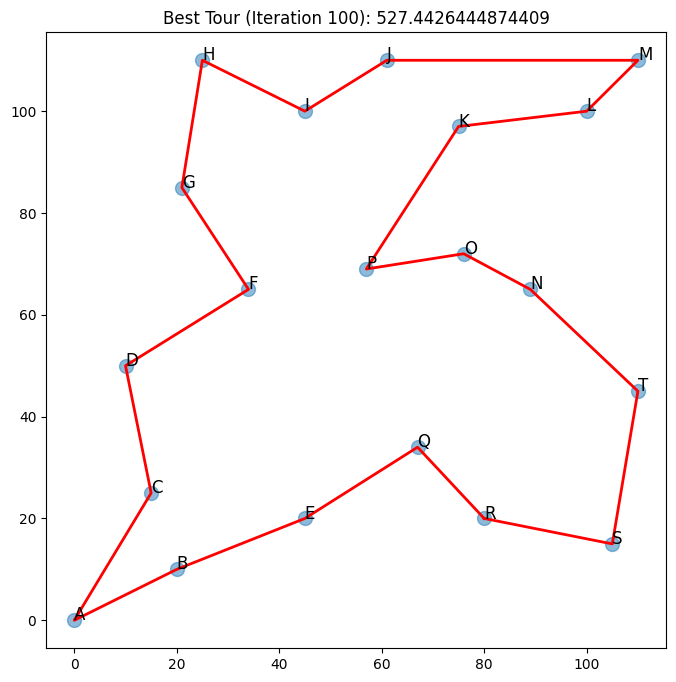

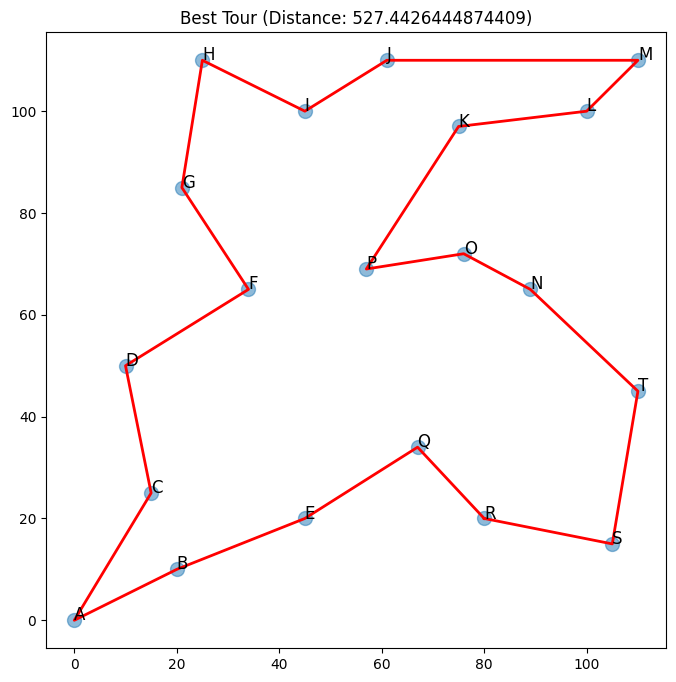

In [54]:
tsp = TSP(cities, coordinates, selection_method='tournament', tournament_size=8, mutation_rate=0.5, mutation_method='inversion')
ani, best_pop = tsp.evolve(100, anim=True)

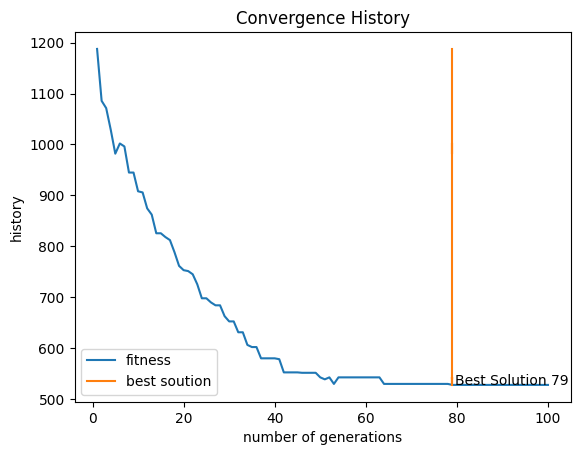

In [55]:
tsp.plot_history()

In [ ]:
cities, coordinates = generate_cities(10, (-20, 20), (-40, 40))

In [56]:
num_cities = 20
radius = 10

# generate cities
cities = generate_cities(num_cities, (-10,10), (-10,10))[0]

# generate coordinates
theta = np.linspace(0, 2*np.pi, num_cities, endpoint=False)
x = radius * np.cos(theta)
y = radius * np.sin(theta)
coordinates = np.column_stack((x, y))

In [57]:
coordinates

array([[ 1.00000000e+01,  0.00000000e+00],
       [ 9.51056516e+00,  3.09016994e+00],
       [ 8.09016994e+00,  5.87785252e+00],
       [ 5.87785252e+00,  8.09016994e+00],
       [ 3.09016994e+00,  9.51056516e+00],
       [ 6.12323400e-16,  1.00000000e+01],
       [-3.09016994e+00,  9.51056516e+00],
       [-5.87785252e+00,  8.09016994e+00],
       [-8.09016994e+00,  5.87785252e+00],
       [-9.51056516e+00,  3.09016994e+00],
       [-1.00000000e+01,  1.22464680e-15],
       [-9.51056516e+00, -3.09016994e+00],
       [-8.09016994e+00, -5.87785252e+00],
       [-5.87785252e+00, -8.09016994e+00],
       [-3.09016994e+00, -9.51056516e+00],
       [-1.83697020e-15, -1.00000000e+01],
       [ 3.09016994e+00, -9.51056516e+00],
       [ 5.87785252e+00, -8.09016994e+00],
       [ 8.09016994e+00, -5.87785252e+00],
       [ 9.51056516e+00, -3.09016994e+00]])

Iteration 1: Tour: ['M', 'R', 'Q', 'J', 'P', 'S', 'K', 'O', 'L', 'G', 'H', 'I', 'A', 'C', 'F', 'T', 'E', 'D', 'B', 'N'], Distance: 219.79855871771517
Iteration 1: Tour: ['I', 'J', 'M', 'R', 'S', 'T', 'H', 'K', 'O', 'L', 'P', 'N', 'Q', 'G', 'A', 'F', 'D', 'B', 'C', 'E'], Distance: 204.06391837663975
Iteration 1: Tour: ['J', 'I', 'G', 'L', 'O', 'K', 'P', 'Q', 'R', 'B', 'A', 'T', 'S', 'C', 'H', 'M', 'F', 'E', 'D', 'N'], Distance: 193.45686249666528
Iteration 1: Tour: ['I', 'J', 'M', 'G', 'L', 'O', 'K', 'P', 'Q', 'R', 'B', 'A', 'T', 'S', 'C', 'H', 'F', 'E', 'D', 'N'], Distance: 191.52760742721986
Iteration 2: Tour: ['M', 'J', 'I', 'G', 'L', 'O', 'K', 'N', 'D', 'E', 'F', 'H', 'C', 'S', 'T', 'A', 'B', 'R', 'Q', 'P'], Distance: 166.34063054039981
Iteration 3: Tour: ['M', 'J', 'I', 'G', 'L', 'O', 'K', 'N', 'D', 'E', 'F', 'H', 'C', 'S', 'T', 'A', 'B', 'R', 'Q', 'P'], Distance: 166.34063054039981
Iteration 4: Tour: ['M', 'L', 'G', 'I', 'J', 'O', 'K', 'N', 'D', 'E', 'F', 'H', 'C', 'S', 'T', 'A', 

(<matplotlib.animation.FuncAnimation at 0x7f2c9e0f4d30>,
 array(['N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B',
        'A', 'T', 'S', 'R', 'Q', 'P', 'O'], dtype='<U1'))

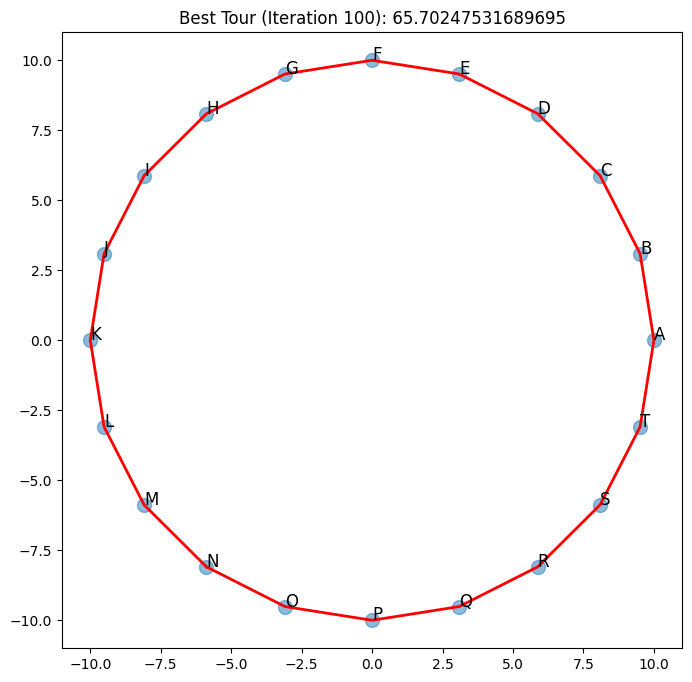

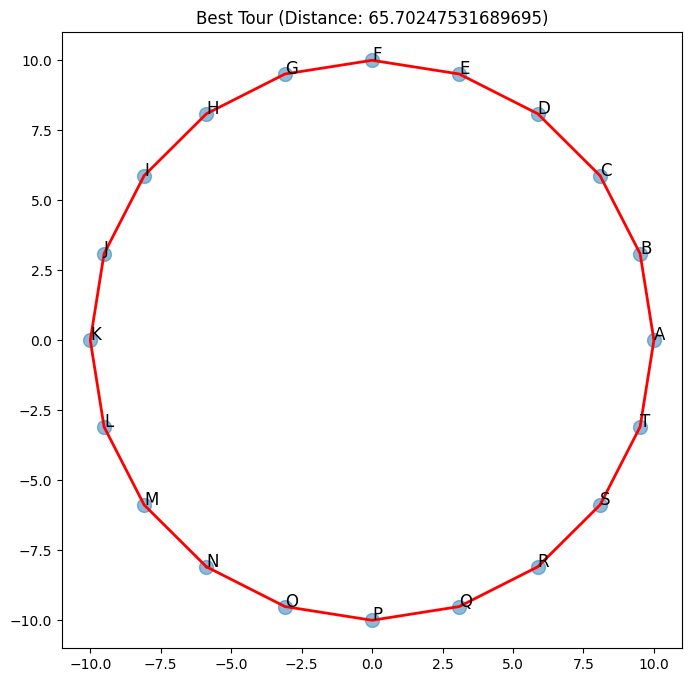

In [58]:
tsp = TSP(cities, coordinates, selection_method='tournament',
          tournament_size=8, mutation_rate=0.5, mutation_method='inversion')
tsp.evolve(100, anim=True)

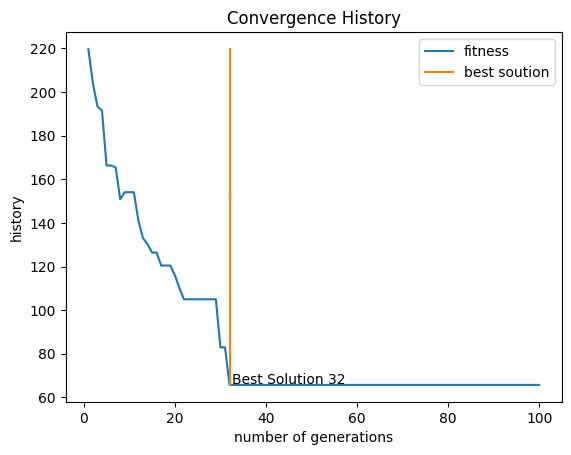

In [59]:
tsp.plot_history()

# Hyperparameter Tuning

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import random
import pandas as pd
from tqdm.auto import tqdm

class LogisticRegressionGA:
    def __init__(self, penalty=['l1', 'l2'], solver=['liblinear', 'saga'], max_iter=[100, 200, 300, 500, 800], C=[0.1, 1, 10, 100], population_size=20, num_generations=50, mutation_rate=0.1):
        self.penalty = penalty
        self.solver = solver
        self.max_iter = max_iter
        self.C = C
        self.population_size = population_size
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.best_clf = None
        self.best_params = None

    def fit(self, X, y):
        # Define the fitness function
        def fitness_function(params):
            if params[0] == 'l1' and params[1] == 'lbfgs':
                # Skip this combination of penalty and solver
                return 0.0
            else:
                clf = LogisticRegression(penalty=params[0], solver=params[1], max_iter=params[2], C=params[3])
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
                clf.fit(X_train, y_train)
                return clf.score(X_val, y_val)

        # Generate the initial population
        population = []
        for i in range(self.population_size):
            params = [np.random.choice(self.penalty), np.random.choice(self.solver), np.random.choice(self.max_iter), np.random.choice(self.C)]
            population.append(params)

        # Evolve the population
        for generation in tqdm(range(self.num_generations)):
            # Evaluate the fitness of each individual
            fitness_scores = [fitness_function(params) for params in population]

            # Select the fittest individuals
            fittest_indices = np.argsort(fitness_scores)[-int(self.population_size/2):]
            fittest_population = [population[i] for i in fittest_indices]

            # Create the next generation
            next_generation = []
            for i in range(self.population_size):
                # Select two parents
                parent1 = random.choice(fittest_population)
                parent2 = random.choice(fittest_population)

                # Apply crossover
                child = [parent1[j] if random.random() < 0.5 else parent2[j] for j in range(len(parent1))]

                # Apply mutation
                for j in range(len(child)):
                    if random.random() < self.mutation_rate:
                        if j == 0:
                            child[j] = np.random.choice(self.penalty)
                        elif j == 1:
                            child[j] = np.random.choice(self.solver)
                        elif j == 2:
                            child[j] = np.random.choice(self.max_iter)
                        elif j == 3:
                            child[j] = np.random.choice(self.C)

                next_generation.append(child)

            population = next_generation

        # Evaluate the fitness of the final population
        fitness_scores = [fitness_function(params) for params in population]

        # Select the fittest individual
        fittest_index = np.argmax(fitness_scores)
        fittest_params = population[fittest_index]

        # Train the final model with the fittest hyperparameters
        self.best_params = {'penalty': fittest_params[0], 'solver': fittest_params[1], 'max_iter': fittest_params[2], 'C': fittest_params[3]}
        self.best_clf = LogisticRegression(penalty=fittest_params[0], solver=fittest_params[1], max_iter=fittest_params[2], C=fittest_params[3])
        self.best_clf.fit(X, y)

    def predict(self, X):
        return self.best_clf.predict(X)

    def score(self, X, y):
        return self.best_clf.score(X, y)

    def get_best_params(self):
        return self.best_params

    def get_best_clf(self):
        return self.best_clf

In [ ]:
x1, x2 = load_breast_cancer(return_X_y=True, as_frame=True)

In [62]:
breast_cancer = load_breast_cancer()

In [ ]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [63]:
import warnings
warnings.filterwarnings("ignore")
''' how to stop warnings in python '''

' how to stop warnings in python '

In [ ]:
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=35)
lr = LogisticRegressionGA()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

  0%|          | 0/50 [00:00<?, ?it/s]

0.9649122807017544


In [ ]:
lr.best_params

{'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 800, 'C': 100.0}

In [ ]:
lr.best_clf

LogisticRegression(C=100.0, max_iter=800, penalty='l1', solver='liblinear')

In [86]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import random
import pandas as pd
from tqdm.auto import tqdm

class LogisticRegressionGA:
    def __init__(self, penalty=['l1', 'l2', 'elasticnet'], solver=['lbfgs', 'liblinear', 'saga', 'newton-cg', 'newton-cholesky', 'sag'], max_iter=[100, 200, 300, 500, 800], C=[0.1, 1, 10, 100], l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9], population_size=20, num_generations=50, mutation_rate=0.1):
        self.penalty = penalty
        self.solver = solver
        self.max_iter = max_iter
        self.C = C
        self.l1_ratio = l1_ratio
        self.population_size = population_size
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.best_clf = None
        self.best_params = None
        self.fitness_cache = dict()
        self.history = []
    

    def fit(self, X, y, X_test, y_test, test_size, random_state):
        # Define the fitness function
        def fitness_function(params):
            # Check if the fitness value is already in the cache
            key = tuple(params)
            if key in self.fitness_cache:
                return self.fitness_cache[key]

            # Define the valid combinations of penalty and solver
            valid_combinations = {
                'lbfgs': ['l2', None],
                'liblinear': ['l1', 'l2'],
                'newton-cg': ['l2', None],
                'newton-cholesky': ['l2', None],
                'sag': ['l2', None],
                'saga': ['elasticnet', 'l1', 'l2', None]
            }

            # Check if the combination of penalty and solver is valid
            penalty, solver, max_iter, C, l1_ratio = params
            if penalty not in valid_combinations[solver]:
                # Skip this combination of penalty and solver
                fitness = 0.0
            else:
                if C is None and solver == 'saga' and penalty == 'elasticnet':
                    C = 1.0
                if l1_ratio is None and solver == 'saga' and penalty == 'elasticnet':
                    l1_ratio = 0.5
                clf = LogisticRegression(penalty=penalty, solver=solver, max_iter=max_iter, C=C, l1_ratio=l1_ratio)
                clf.fit(X, y)
                fitness = clf.score(X_test, y_test)

            # Add the fitness value to the cache
            self.fitness_cache[key] = fitness

            return fitness

        # Generate the initial population
        population = []
        for i in range(self.population_size):
            params = [np.random.choice(self.penalty), np.random.choice(self.solver), np.random.choice(self.max_iter), np.random.choice(self.C), np.random.choice(self.l1_ratio)]
            population.append(params)

        # Evolve the population
        for generation in tqdm(range(self.num_generations)):
            # Evaluate the fitness of each individual
            fitness_scores = [fitness_function(params) for params in population]

            # Select the fittest individuals
            fittest_indices = np.argsort(fitness_scores)[-int(self.population_size/2):]
            fittest_population = [population[i] for i in fittest_indices]

            # Add the fittest individuals from the previous generation to the next generation
            next_generation = fittest_population[:]

            # Create the next generation
            for i in range(self.population_size - len(next_generation)):
                # Select two parents
                parent1 = random.choice(fittest_population)
                parent2 = random.choice(fittest_population)

                # Apply crossover
                child = [parent1[j] if random.random() < 0.5 else parent2[j] for j in range(len(parent1))]

                # Apply mutation
                for j in range(len(child)):
                    if random.random() < self.mutation_rate:
                        if j == 0:
                            child[j] = np.random.choice(self.penalty)
                        elif j == 1:
                            child[j] = np.random.choice(self.solver)
                        elif j == 2:
                            child[j] = np.random.choice(self.max_iter)
                        elif j == 3:
                            child[j] = np.random.choice(self.C)
                        elif j == 4:
                            child[j] = np.random.choice(self.l1_ratio)

                next_generation.append(child)

            # Update the population
            population = next_generation

            fitness_scores = [fitness_function(params) for params in population]
            self.history.append(np.max(fitness_scores))
            print(f"Iteration {generation+1}: {population[np.argmax(fitness_scores)]}: Accuracy: {self.history[-1]}")

        # Select the best individual
        fitness_scores = [fitness_function(params) for params in population]
        best_index = np.argmax(fitness_scores)
        self.best_params = population[best_index]
        self.best_clf = LogisticRegression(penalty=self.best_params[0], solver=self.best_params[1], max_iter=self.best_params[2], C=self.best_params[3], l1_ratio=self.best_params[4])
        self.best_clf.fit(X, y)
    
    # Define the plot history function
    def plot_history(self):
        x = np.arange(1, self.num_generations+1)
        fig = plt.figure(dpi=100)
        plt.plot(x, self.history)
        plt.xlabel("number of generations")
        plt.ylabel("history")
        plt.title("Convergence History {Iterations vs. Fitness}")
        plt.legend(["fitness"])
        plt.savefig(f'ch_lr_ga_{time.strftime("%a_%d_%b_%Y_%H_%M_%S")}.png', dpi=250, format='png')
        # plt.pause(10)     # not requires in jupyter notebook

    def predict(self, X):
        return self.best_clf.predict(X)

    def score(self, X, y):
        return self.best_clf.score(X, y)

    def get_best_params(self):
        return self.best_params

    def get_best_clf(self):
        return self.best_clf

In [87]:
%%time
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=35)
lr_cached = LogisticRegressionGA()
lr_cached.fit(X_train, y_train, X_test, y_test, test_size=0.2,random_state=35)

print(lr_cached.score(X_test, y_test))

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1: ['l2', 'newton-cg', 100, 100.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 2: ['l2', 'newton-cg', 100, 100.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 3: ['l2', 'liblinear', 100, 10.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 4: ['l2', 'liblinear', 100, 10.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 5: ['l2', 'liblinear', 500, 10.0, 0.3]: Accuracy: 0.9824561403508771
Iteration 6: ['l2', 'liblinear', 300, 10.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 7: ['l2', 'liblinear', 100, 100.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 8: ['l2', 'newton-cg', 100, 100.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 9: ['l2', 'liblinear', 100, 100.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 10: ['l2', 'liblinear', 100, 100.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 11: ['l2', 'liblinear', 100, 10.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 12: ['l2', 'liblinear', 100, 100.0, 0.5]: Accuracy: 0.9824561403508771
Iteration 13: ['l1', 'liblinear', 100, 10.

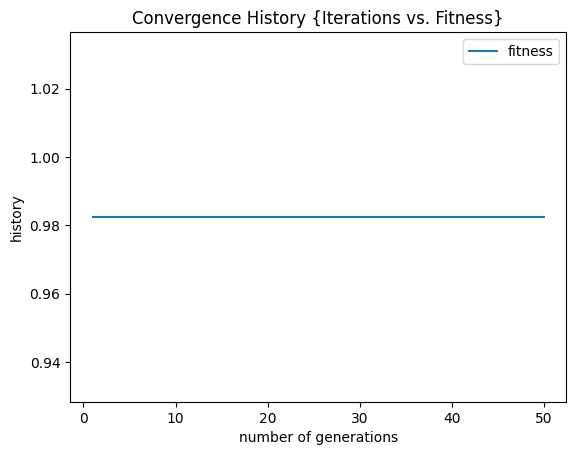

In [88]:
lr_cached.plot_history()

In [89]:
lr_cached.best_params

['l2', 'liblinear', 100, 10.0, 0.5]

In [90]:
lr_cached.best_clf

LogisticRegression(C=10.0, l1_ratio=0.5, solver='liblinear')

In [91]:
lr_cached.best_clf

LogisticRegression(C=10.0, l1_ratio=0.5, solver='liblinear')

In [92]:
lr_cached.best_clf.score(X_test, y_test)

0.9824561403508771

In [94]:
lr_brute = LogisticRegression(C=10.0, l1_ratio=0.5, solver='liblinear')

In [95]:
lr_brute.fit(X_train,y_train)

LogisticRegression(C=10.0, l1_ratio=0.5, solver='liblinear')

In [96]:
lr_brute.score(X_test, y_test)

0.9824561403508771

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
lrCV = LogisticRegression()

# Define the hyperparameters to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg', 'newton-cholesky', 'sag'],
    'max_iter': [100, 200, 300, 500, 800],
    'l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Perform GridSearchCV
grid_search = GridSearchCV(lrCV, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'l1_ratio': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.9670329670329669
CPU times: user 6.37 s, sys: 284 ms, total: 6.65 s
Wall time: 5min 8s


In [ ]:
grid_search.n_splits_

5

In [ ]:
lr_grid = LogisticRegression(C=10, l1_ratio = 0.1, max_iter= 200, penalty= 'l1', solver= 'liblinear')
lr_grid.fit(X_train, y_train)
print(lr_grid.score(X_test, y_test))

0.9824561403508771
